# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, confusion_matrix


# LOADING DATABASE

In [ ]:
df = pd.read_csv('advertising_sales_data.csv')

x= df.iloc[:,1:4]
y = df.iloc[:,-1]

'''
print(x)
print(y)
'''

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


# SPLITTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)


'''
print(x_train)
print(x_test)
print(y_train)
print(y_test)
'''

        TV  Radio  Newspaper
71   109.8   14.3       31.7
124  229.5   32.3       74.2
184  253.8   21.3       30.0
97   184.9   21.0       22.0
149   44.7   25.8       20.6
..     ...    ...        ...
67   139.3   14.5       10.2
192   17.2    4.1       31.6
117   76.4    0.8       14.8
47   239.9   41.5       18.5
172   19.6   20.1       17.0

[150 rows x 3 columns]
        TV  Radio  Newspaper
18    69.2   20.5       18.3
170   50.0   11.6       18.4
107   90.4    0.3       23.2
98   289.7   42.3       51.2
177  170.2    7.8       35.2
182   56.2    5.7       29.7
5      8.7   48.9       75.0
146  240.1    7.3        8.7
12    23.8   35.1       65.9
152  197.6    NaN       14.2
61   261.3   42.7       54.7
125   87.2   11.8       25.9
180  156.6    2.6        8.3
154  187.8   21.1        9.5
80    76.4   26.7       22.3
7    120.2   19.6       11.6
33   265.6   20.0        0.3
130    0.7   39.6        8.7
37    74.7   49.4       45.7
74   213.4   24.6       13.1
183  287.6   43.0  

# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

'''
print(x_train)
print(x_test)
'''

[[-0.52286826 -0.60243407  0.09678234]
 [ 0.89568081  0.60984698  2.18119928]
 [ 1.18365694 -0.13099144  0.01340566]
 [ 0.36713204 -0.15119613 -0.37895517]
 [-1.29435986  0.17207882 -0.44761832]
 [-1.08578456 -0.71692728 -0.56042206]
 [ 1.64702594  0.34045119  0.66080104]
 [ 0.22018125 -0.34650807  0.04773724]
 [ 0.57570734 -0.06364249  0.09187783]
 [-1.73758238  0.3269814   0.57251985]
 [ 1.31875685 -1.37021207  0.65099202]
 [ 0.51763808 -1.3298027  -1.16858136]
 [ 0.76532125 -1.2018397  -0.11411161]
 [-0.07846066         nan -0.52118598]
 [ 0.20596021  1.10822918  0.39105297]
 [ 0.75584055  0.69066571  1.43571369]
 [ 1.28912968  0.37412566 -0.67813031]
 [ 0.11352343  0.91291724 -1.0950137 ]
 [-0.63426643 -0.91897412 -1.2813851 ]
 [-0.91987239  0.28657203 -0.6732258 ]
 [ 0.36713204  1.39109476 -1.37457079]
 [-0.23252196 -1.23551417 -1.001828  ]
 [ 1.41948924  0.38086056  1.47004526]
 [ 1.68850398  0.87924276  3.49070357]
 [-0.68404009 -0.5687596   0.44990709]
 [-0.52286826  1.65375565

# HANDLING MISSING VALUES

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_train[:,0:1])
x_train[:,0:1] = imputer.transform(x_train[:,0:1])
x_test[:,0:1] = imputer.transform(x_test[:,0:1])

'''
print(x_train)
print(x_test)
'''

'\nprint(x_train)\nprint(x_test)\n'

# Average Amount Spent on TV Advertising

In [ ]:
df = pd.read_csv('advertising_sales_data.csv')
average_tv_spend = df['TV'].mean()
print(f"The average amount spent on TV advertising is: ${average_tv_spend:.2f}")


The average amount spent on TV advertising is: $147.04



# Correlation Between Radio Advertising Expenditure and Product Sales


In [ ]:
df = pd.read_csv('advertising_sales_data.csv')

# Checking for infinite values
df.isin([np.inf, -np.inf]).sum()

# Checking for missing values
df.isna().sum()

# Handling infinite values |
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Calculate Pearson correlation
corr_radio_sales, p_value_radio_sales = pearsonr(df['Radio'], df['Sales'])
print(f"Pearson correlation coefficient between radio advertising expenditure and product sales: {corr_radio_sales:.2f}")



Pearson correlation coefficient between radio advertising expenditure and product sales: 0.35


# Advertising Medium with the Highest Impact on Sales

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['TV','Radio','Newspaper']]
y = df['Sales']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:")
print(coefficients)

# Determine the advertising medium with the highest impact
max_impact = coefficients.abs().idxmax()
print(f"The advertising medium with the highest impact on sales is: {max_impact}")


Coefficients:
TV           0.054494
Radio        0.107180
Newspaper   -0.000019
dtype: float64
The advertising medium with the highest impact on sales is: Radio


# Linear Regression Model and Visualization

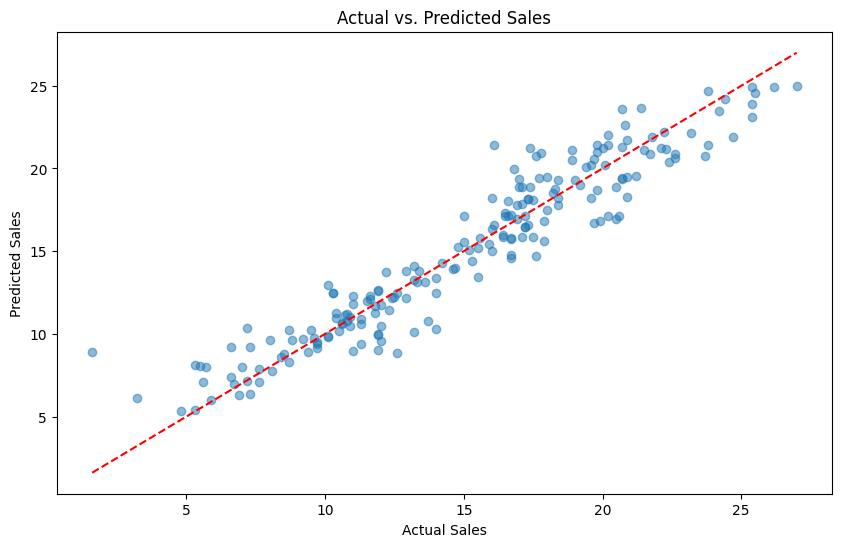

In [ ]:
# Predicting sales using the linear regression model
predictions = model.predict(X)

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


# Predicting Sales for New Advertising Expenditures

In [ ]:
new_ad_spend = [[200, 40, 50]]
predicted_sales = model.predict(new_ad_spend)
print(f"Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: {predicted_sales[0]:.2f}")


Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: 19.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Performance Change When Dataset is Normalized

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting a linear regression model to the normalized data
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)

# Predicting sales and evaluate performance
predictions_scaled = model_scaled.predict(X_scaled)
mse_scaled = mean_squared_error(y, predictions_scaled)
print(f"Mean Squared Error (normalized data): {mse_scaled:.2f}")

# Comparing with the original model's performance
predictions_original = model.predict(X)
mse_original = mean_squared_error(y, predictions_original)
print(f"Mean Squared Error (original data): {mse_original:.2f}")


Mean Squared Error (normalized data): 2.72
Mean Squared Error (original data): 2.72


#  Impact on Sales Prediction Using Only Radio and Newspaper Advertising Expenditures

In [ ]:
X_radio_newspaper = df[['Radio', 'Newspaper']]

model_radio_newspaper = LinearRegression()
model_radio_newspaper.fit(X_radio_newspaper, y)

# Predicting sales
predictions_radio_newspaper = model_radio_newspaper.predict(X_radio_newspaper)

# Evaluating performance
mse_radio_newspaper = mean_squared_error(y, predictions_radio_newspaper)
print(f"Mean Squared Error (using only Radio and Newspaper): {mse_radio_newspaper:.2f}")


Mean Squared Error (using only Radio and Newspaper): 24.58
